In [1]:
# Load libraries
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import xgboost
import lightgbm
import csv
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import mean_absolute_error
import joblib

In [10]:
#load the dataset
heart_dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [11]:
heart_dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Data dictionary

Age: Age of patient

Anaemia: Condition where patient lack red blood cells to carry oxygen to body tissues (boolean)

Creatinine Phosphokinase: An enzyme by various tissues and cell types in the blood (mcg/L)

Diabetes: If the patient has diabetes (boolean)

Ejection Fraction: Ejection fraction (EF) is measured as a percentage, how much blood the left ventricle pumps out with each contraction.

High blood Pressure: Whether the person has high blood pressure (boolean)

Platelets: Cells in our blood that form clots to stop bleeding

Serum Creatinine: To measure the level of creatinine in your blood which determines whether your kidney is working well

Serum Sodium: Amount of sodium in your blood

Sex: gender of patient 

Smoking: Whether or not the person has smoke or not (boolean)

Time: The number of days the patient took to follow up on the visit

Death event: Whether theh patient has been pronounced dead (boolean)

In [12]:
#get total number of rows and columns
print(heart_dataset.shape)

(299, 13)


In [13]:
# get the top 20 rows of data
heart_dataset.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
# statistical description with total count, mean, std, min
print(heart_dataset.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [7]:
#Find the missing values for all columns
heart_dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [179]:
#there is no missing values in any columns

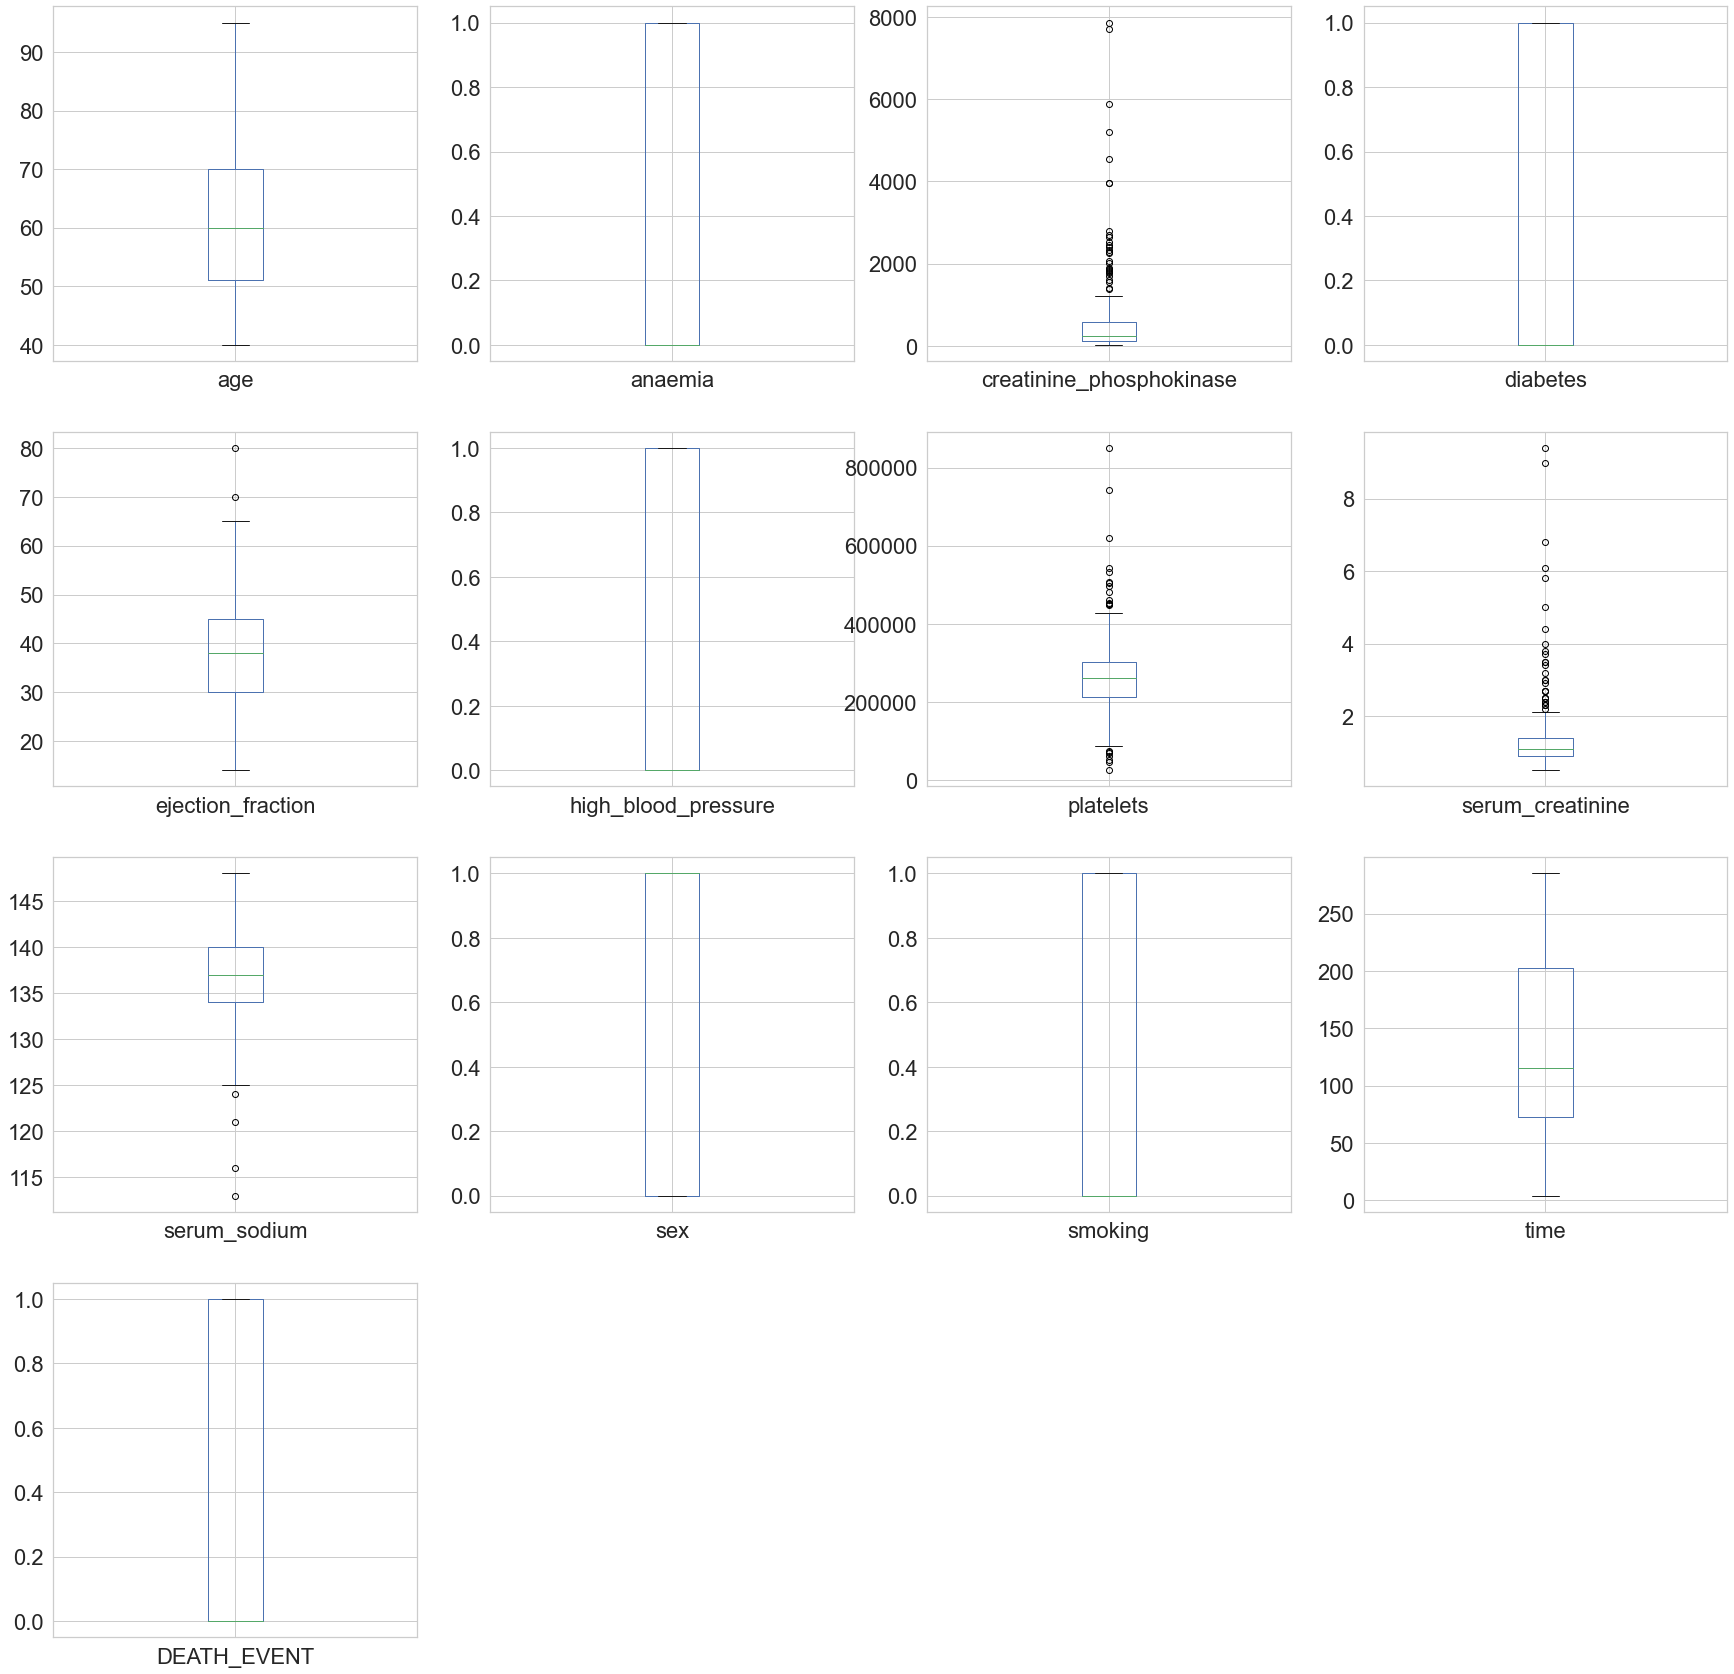

In [180]:
# displaying the statistical description in box plot
sns.set(rc={'figure.figsize':(30,30)}, font_scale=2, style='whitegrid')
heart_dataset.plot(kind='box', subplots=True, layout=(4,4))
plt.show()

C:\Users\timot\Miniconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


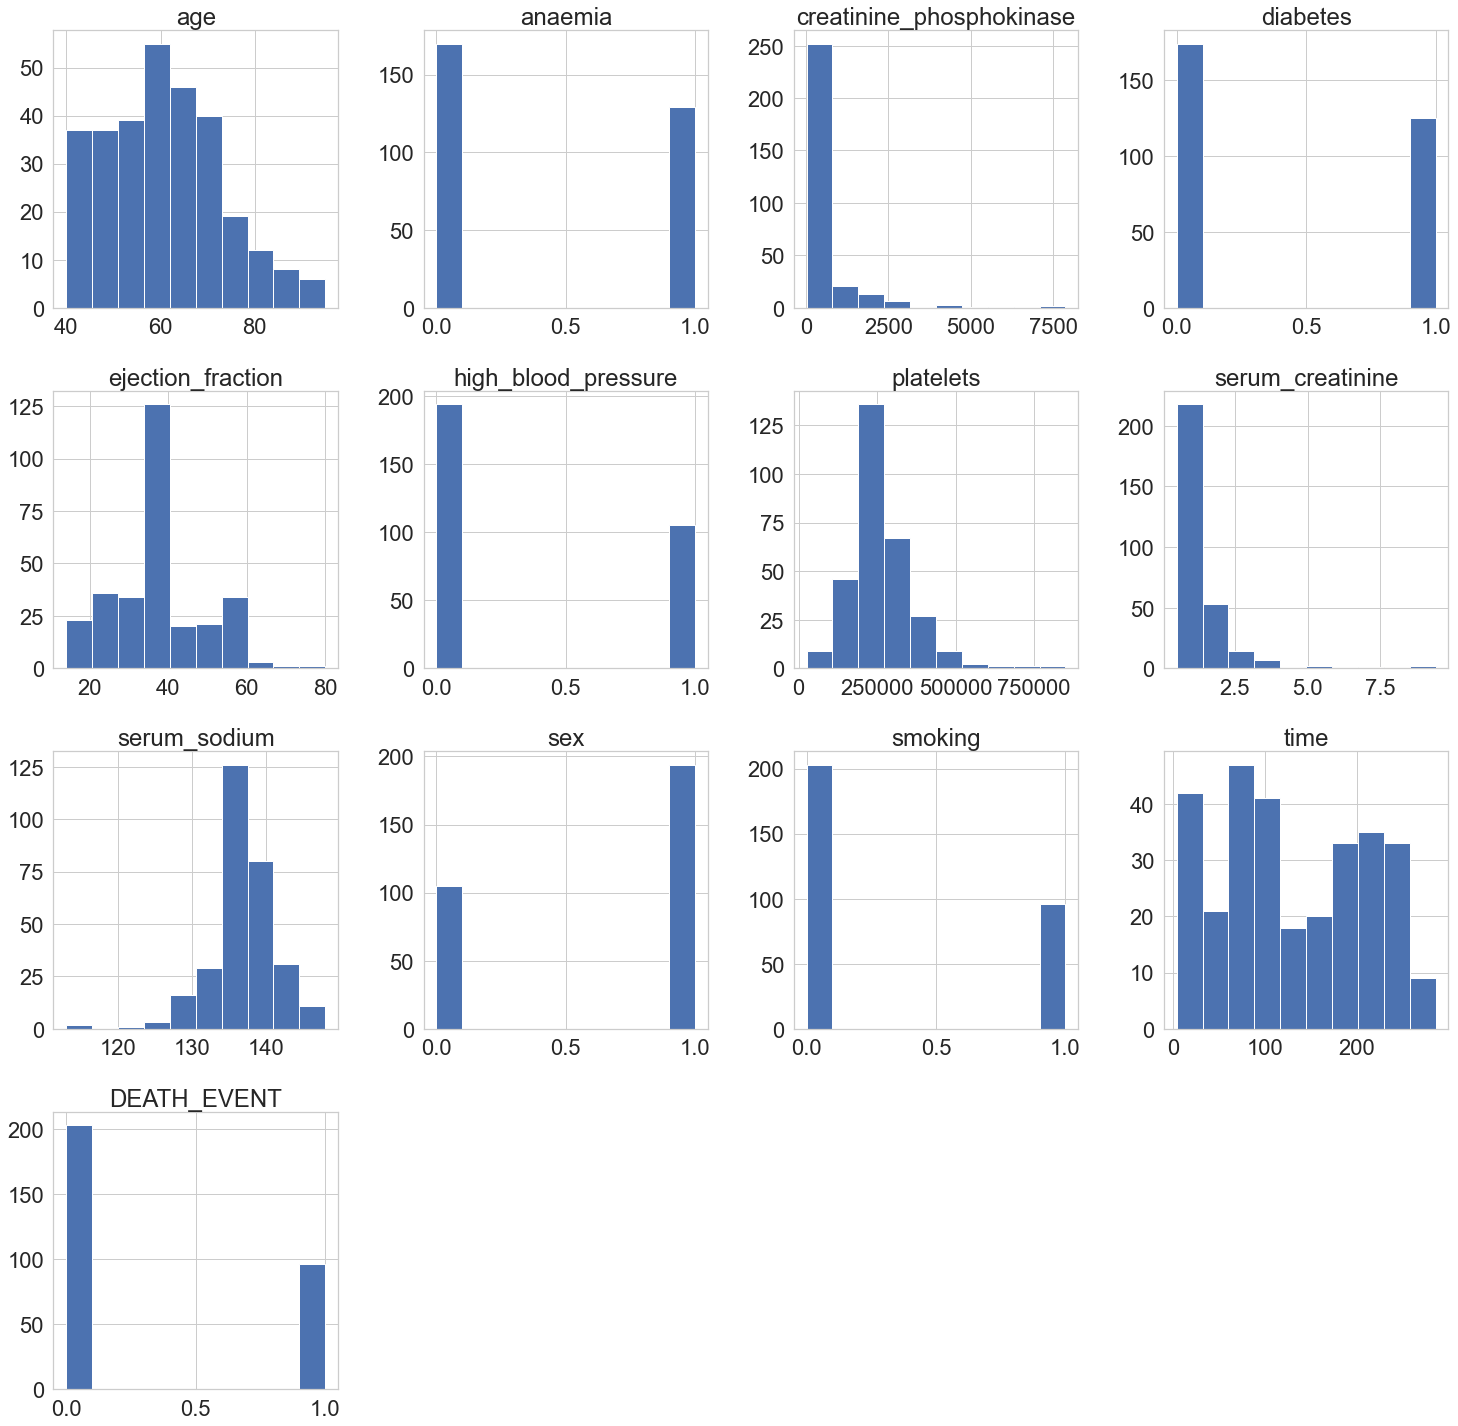

In [181]:
#showing dataset in histogram graph
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
heart_dataset.hist(ax=ax)
plt.show()

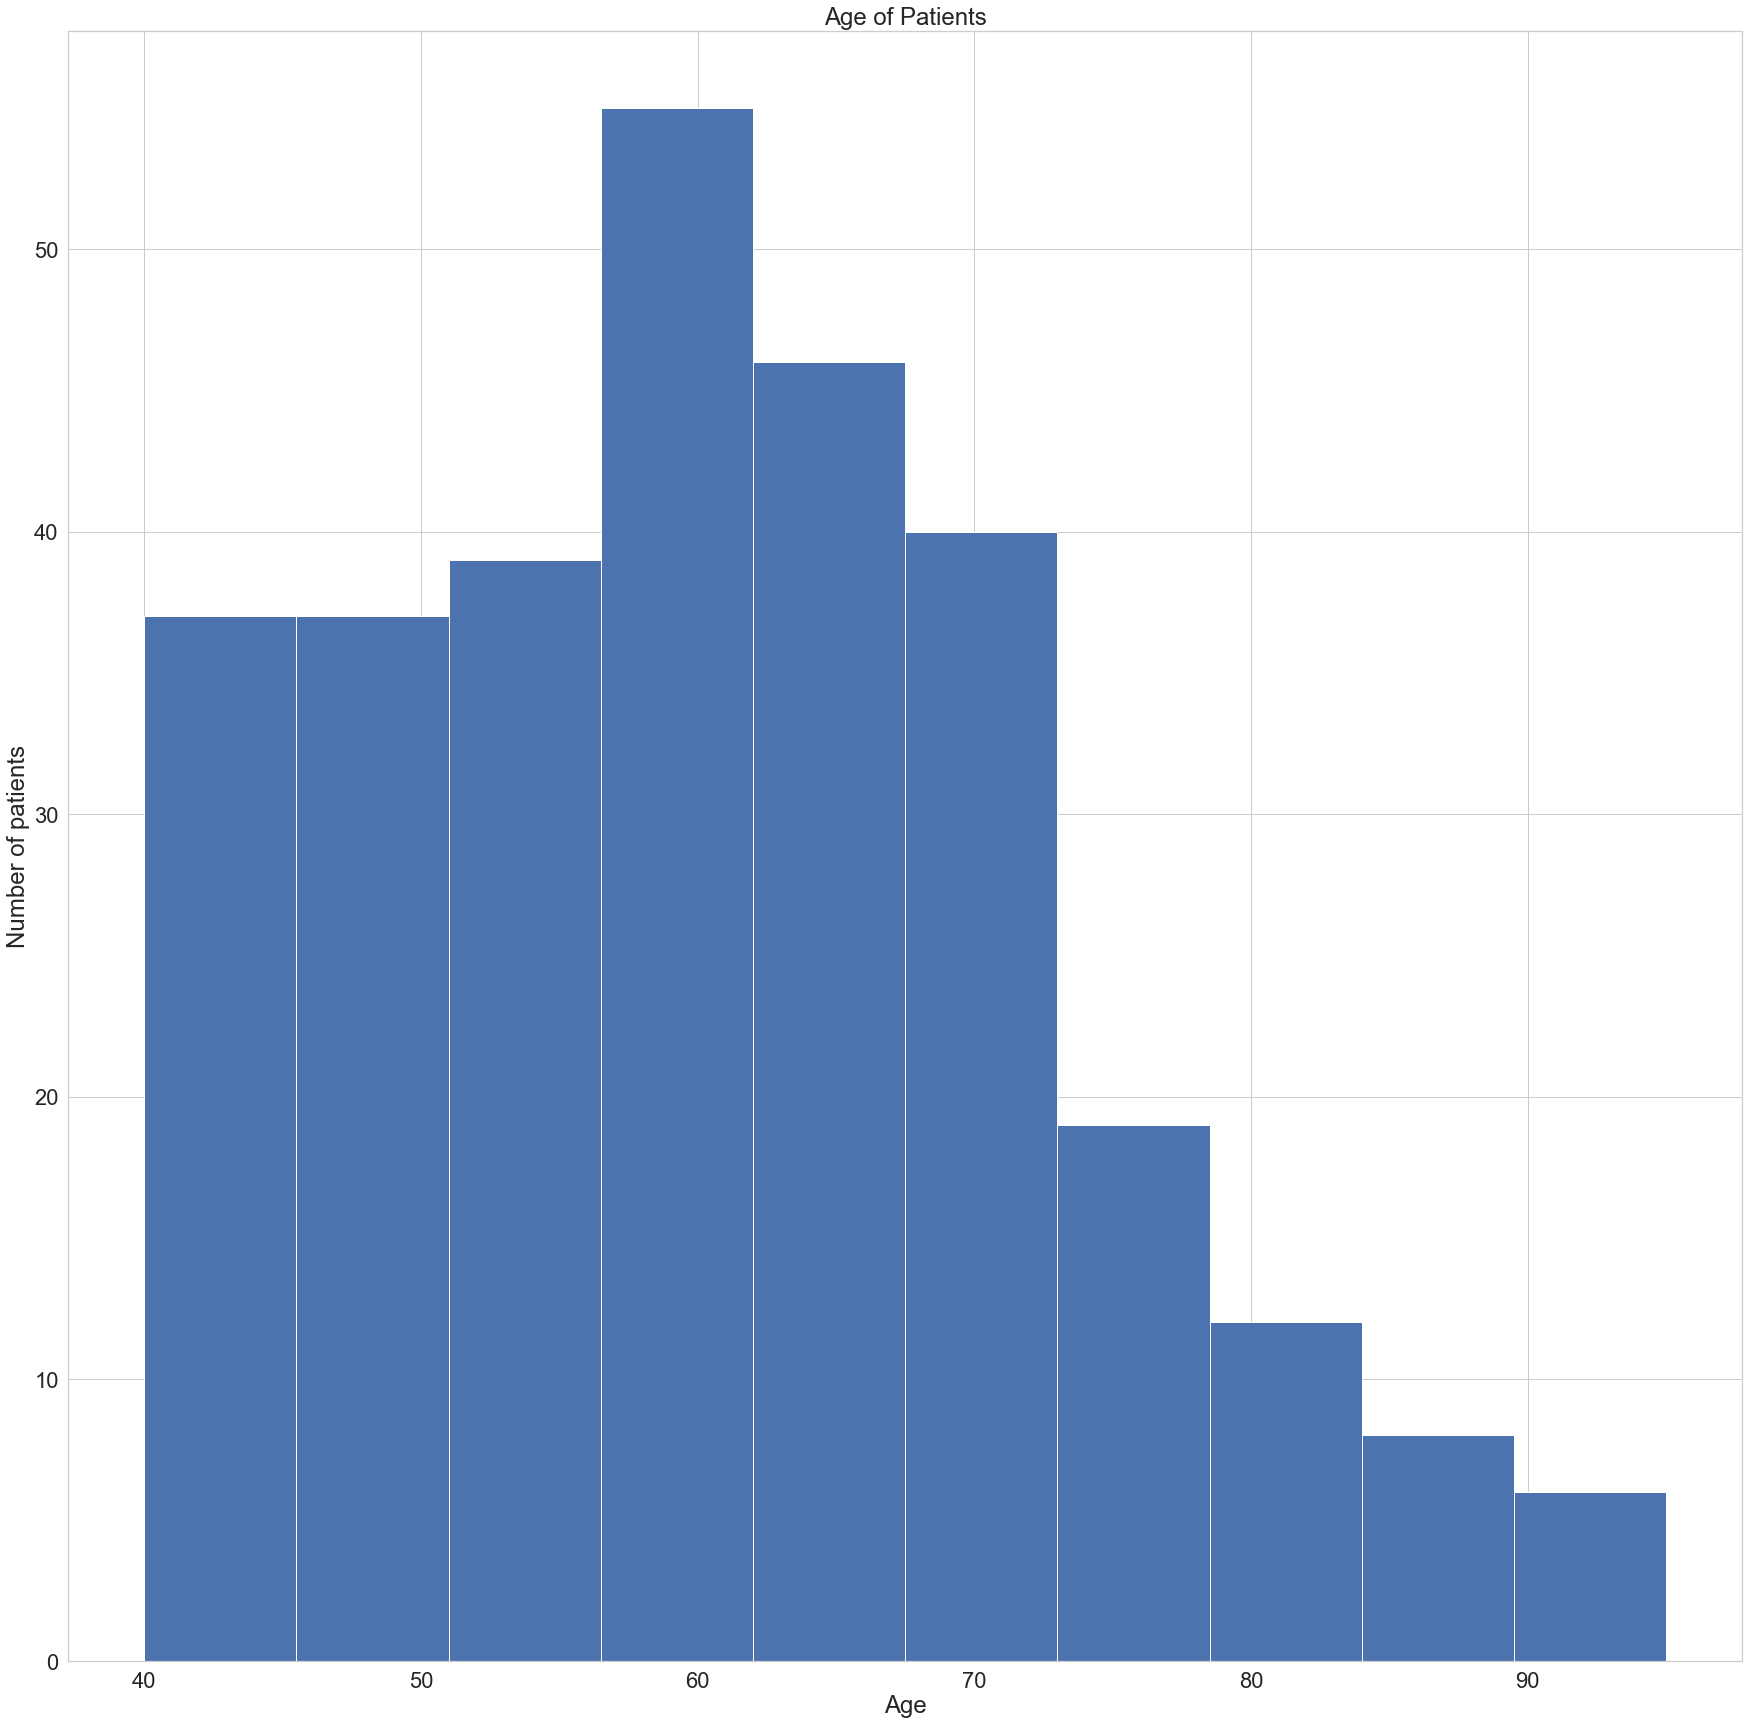

In [182]:
# histograms
heart_dataset.hist("age")
plt.title("Age of Patients")
params = {'axes.titlesize':'35',
          'xtick.labelsize':'25',
          'ytick.labelsize':'25'}
matplotlib.rcParams.update(params)

plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()

In [29]:
#Majority of the patients are from 50 to 70

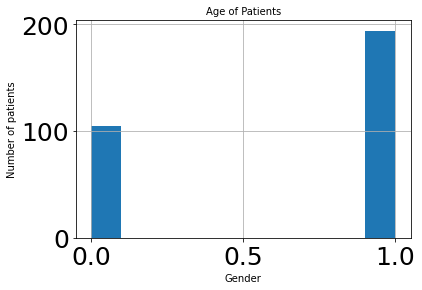

In [66]:
# histograms
heart_dataset.hist("sex")
plt.title("Age of Patients")
params = {'axes.titlesize':'10',
          'xtick.labelsize':'25',
          'ytick.labelsize':'25'}
matplotlib.rcParams.update(params)

plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.show()

0 represents female

1 represents male

There are more about 2 times more males than males

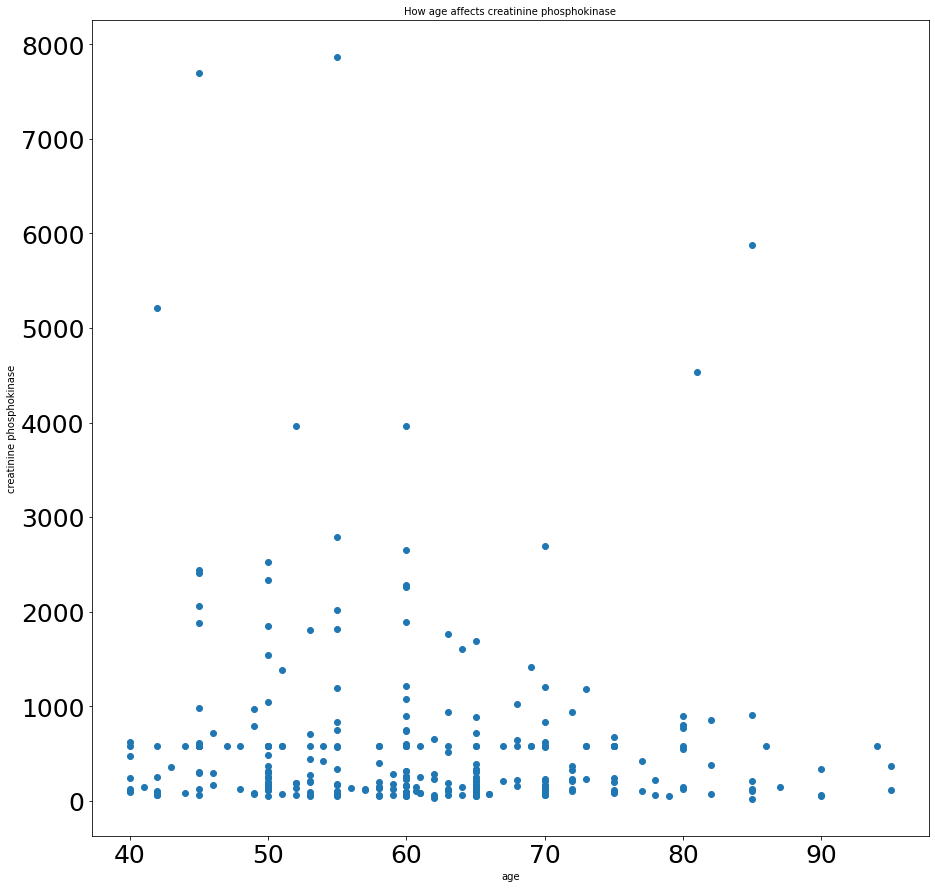

In [67]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

age = heart_dataset['age']
creatinine_phosphokinase = heart_dataset['creatinine_phosphokinase']

plt.scatter(age, creatinine_phosphokinase)

plt.xlabel('age')
plt.ylabel('creatinine phosphokinase')
plt.title('How age affects creatinine phosphokinase')

plt.show()

From the diagram above as people get older, the creatinine phosphokinase decreases.

creatinine phosphokinase also known as CK is an enzyme that helps to elicit the chemical changes in the body
When muscle tissue is damaged, CPK leaks into your blood in mcg/L.
When CK is high, there means there is a injury or stress in the heart muscles
If CK is low, there is a connective tissue disease in the patient meaning that the muscle is weak and is not able to pump well

The normal range of CK for male is 39 to 308 while for female it is 26 to 192

Majority of the patients are of the range from 0 to 1000 mg/l which is normal.
However, there are some patients who are above the range of 1000 which means they have high CPK

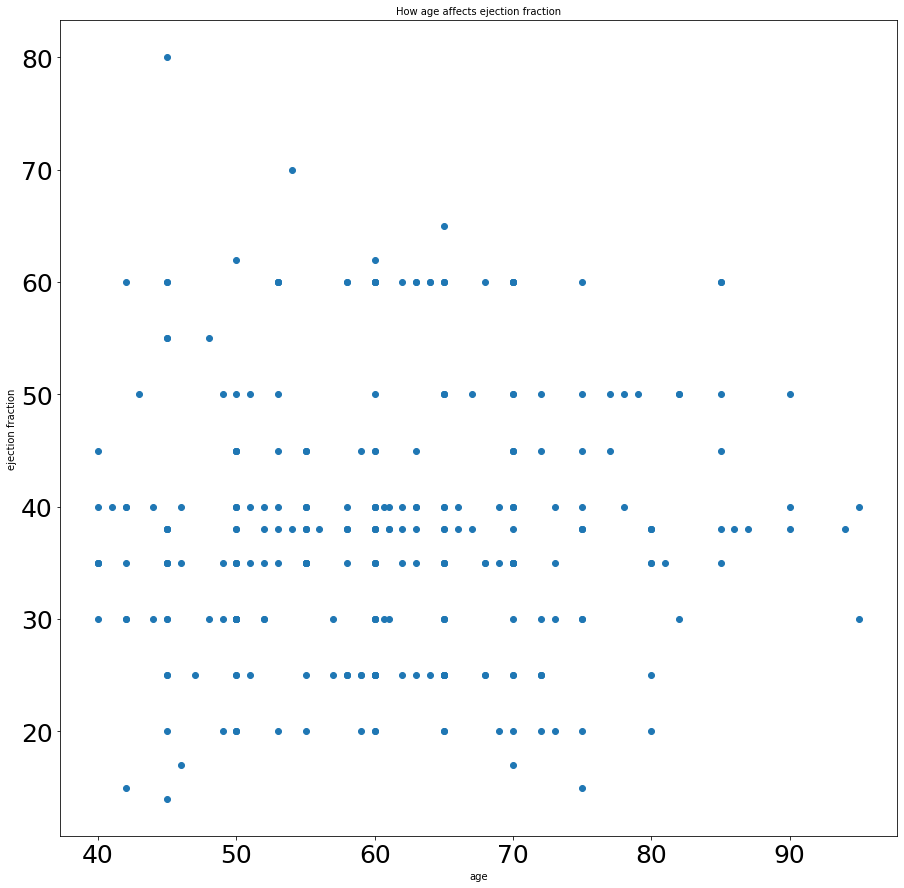

In [63]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

age = heart_dataset['age']
ejection_fraction = heart_dataset['ejection_fraction']

plt.scatter(age, ejection_fraction)

plt.xlabel('age')
plt.ylabel('ejection fraction')
plt.title('How age affects ejection fraction')

plt.show()

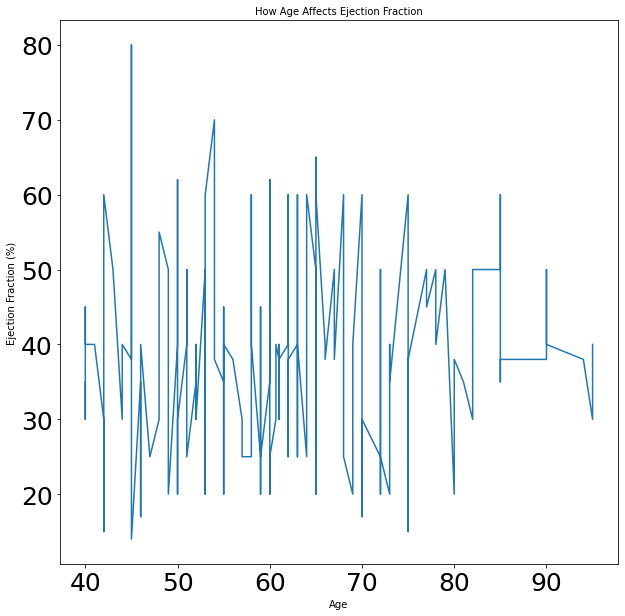

In [68]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()

# sorting data frame by name 
heart_dataset.sort_values("age", axis = 0, ascending = True, 
                 inplace = True, na_position ='first') 

Age = heart_dataset['age']
ejection_fraction = heart_dataset['ejection_fraction']
  
plt.plot(Age, ejection_fraction)
plt.title('How Age Affects Ejection Fraction')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction (%)')
plt.show()

We can see that as the age increases, the fluctuation for ejection fraction is about the same throughout.

The ejection fraction fluctuates from about 20% to 60%

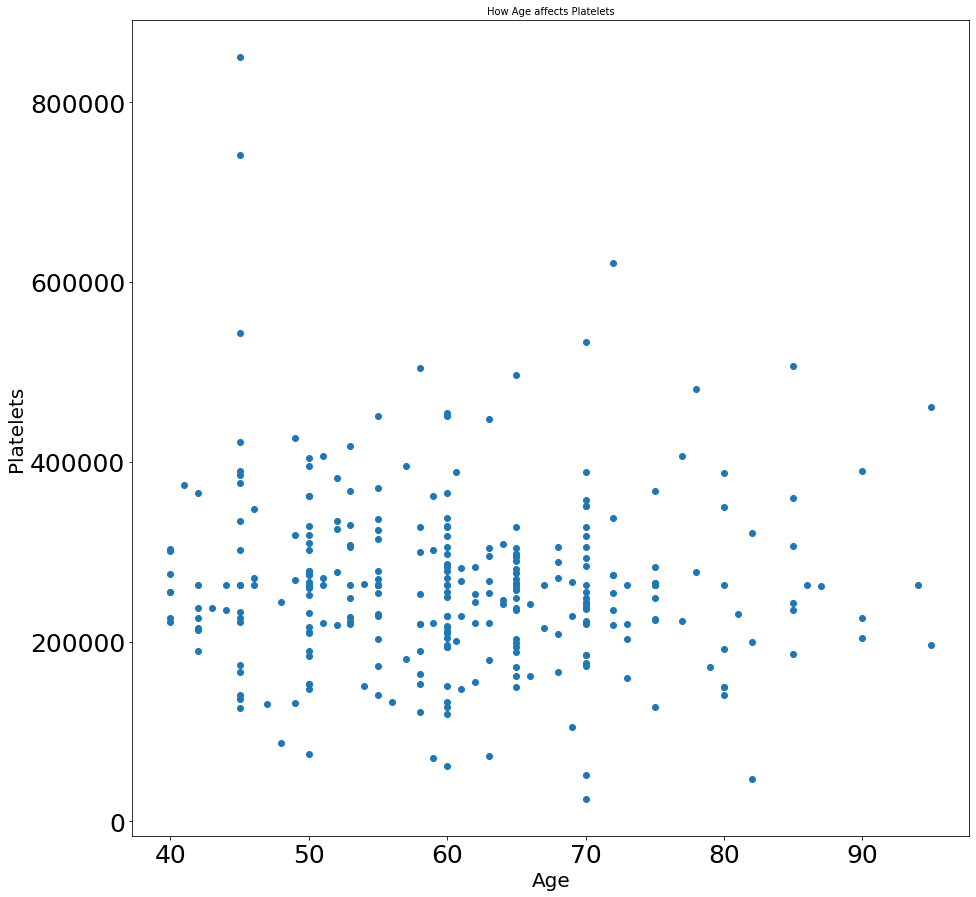

In [76]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

age = heart_dataset['age']
platelets = heart_dataset['platelets']

plt.scatter(age, platelets)

params = {'axes.titlesize':'10',
          'xtick.labelsize':'25',
          'ytick.labelsize':'25'}
matplotlib.rcParams.update(params)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Platelets', fontsize = 20)
plt.title('How Age affects Platelets')

plt.show()

From the scatter plot above, we can see that the range of platelets did not spread much. The patients has a normal range of 150,000 to 450,000. However, there 2 patients who had more than 700,000 which is not in the range, While there are some who are slightly above 450,000

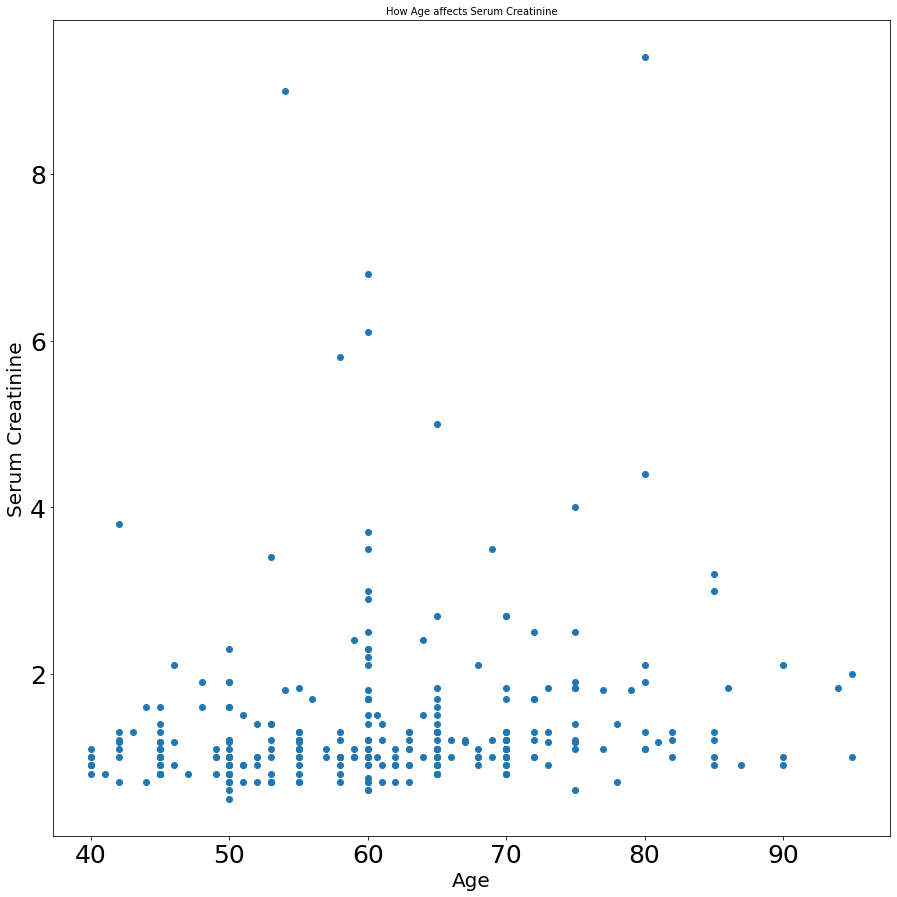

In [81]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

age = heart_dataset['age']
serum_creatinine = heart_dataset['serum_creatinine']

serum_creatinine_range = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5 , 5 , 5.5 , 6 , 6.5 , 7 , 7.5 , 8]

plt.scatter(age, serum_creatinine)

params = {'axes.titlesize':'10',
          'xtick.labelsize':'25',
          'ytick.labelsize':'25'}
matplotlib.rcParams.update(params)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Serum Creatinine', fontsize = 20)
plt.title('How Age affects Serum Creatinine')

plt.show()

0 to 0.6 - Low
0.6 to 1.2 - Medium
1.3 and above - High

From the above scatter plot between age and serum creatinine, the fluctuation did not spread much as we can see the majority of the patients have the normal serum creatinine range. However, There are some patients who have more than 2.

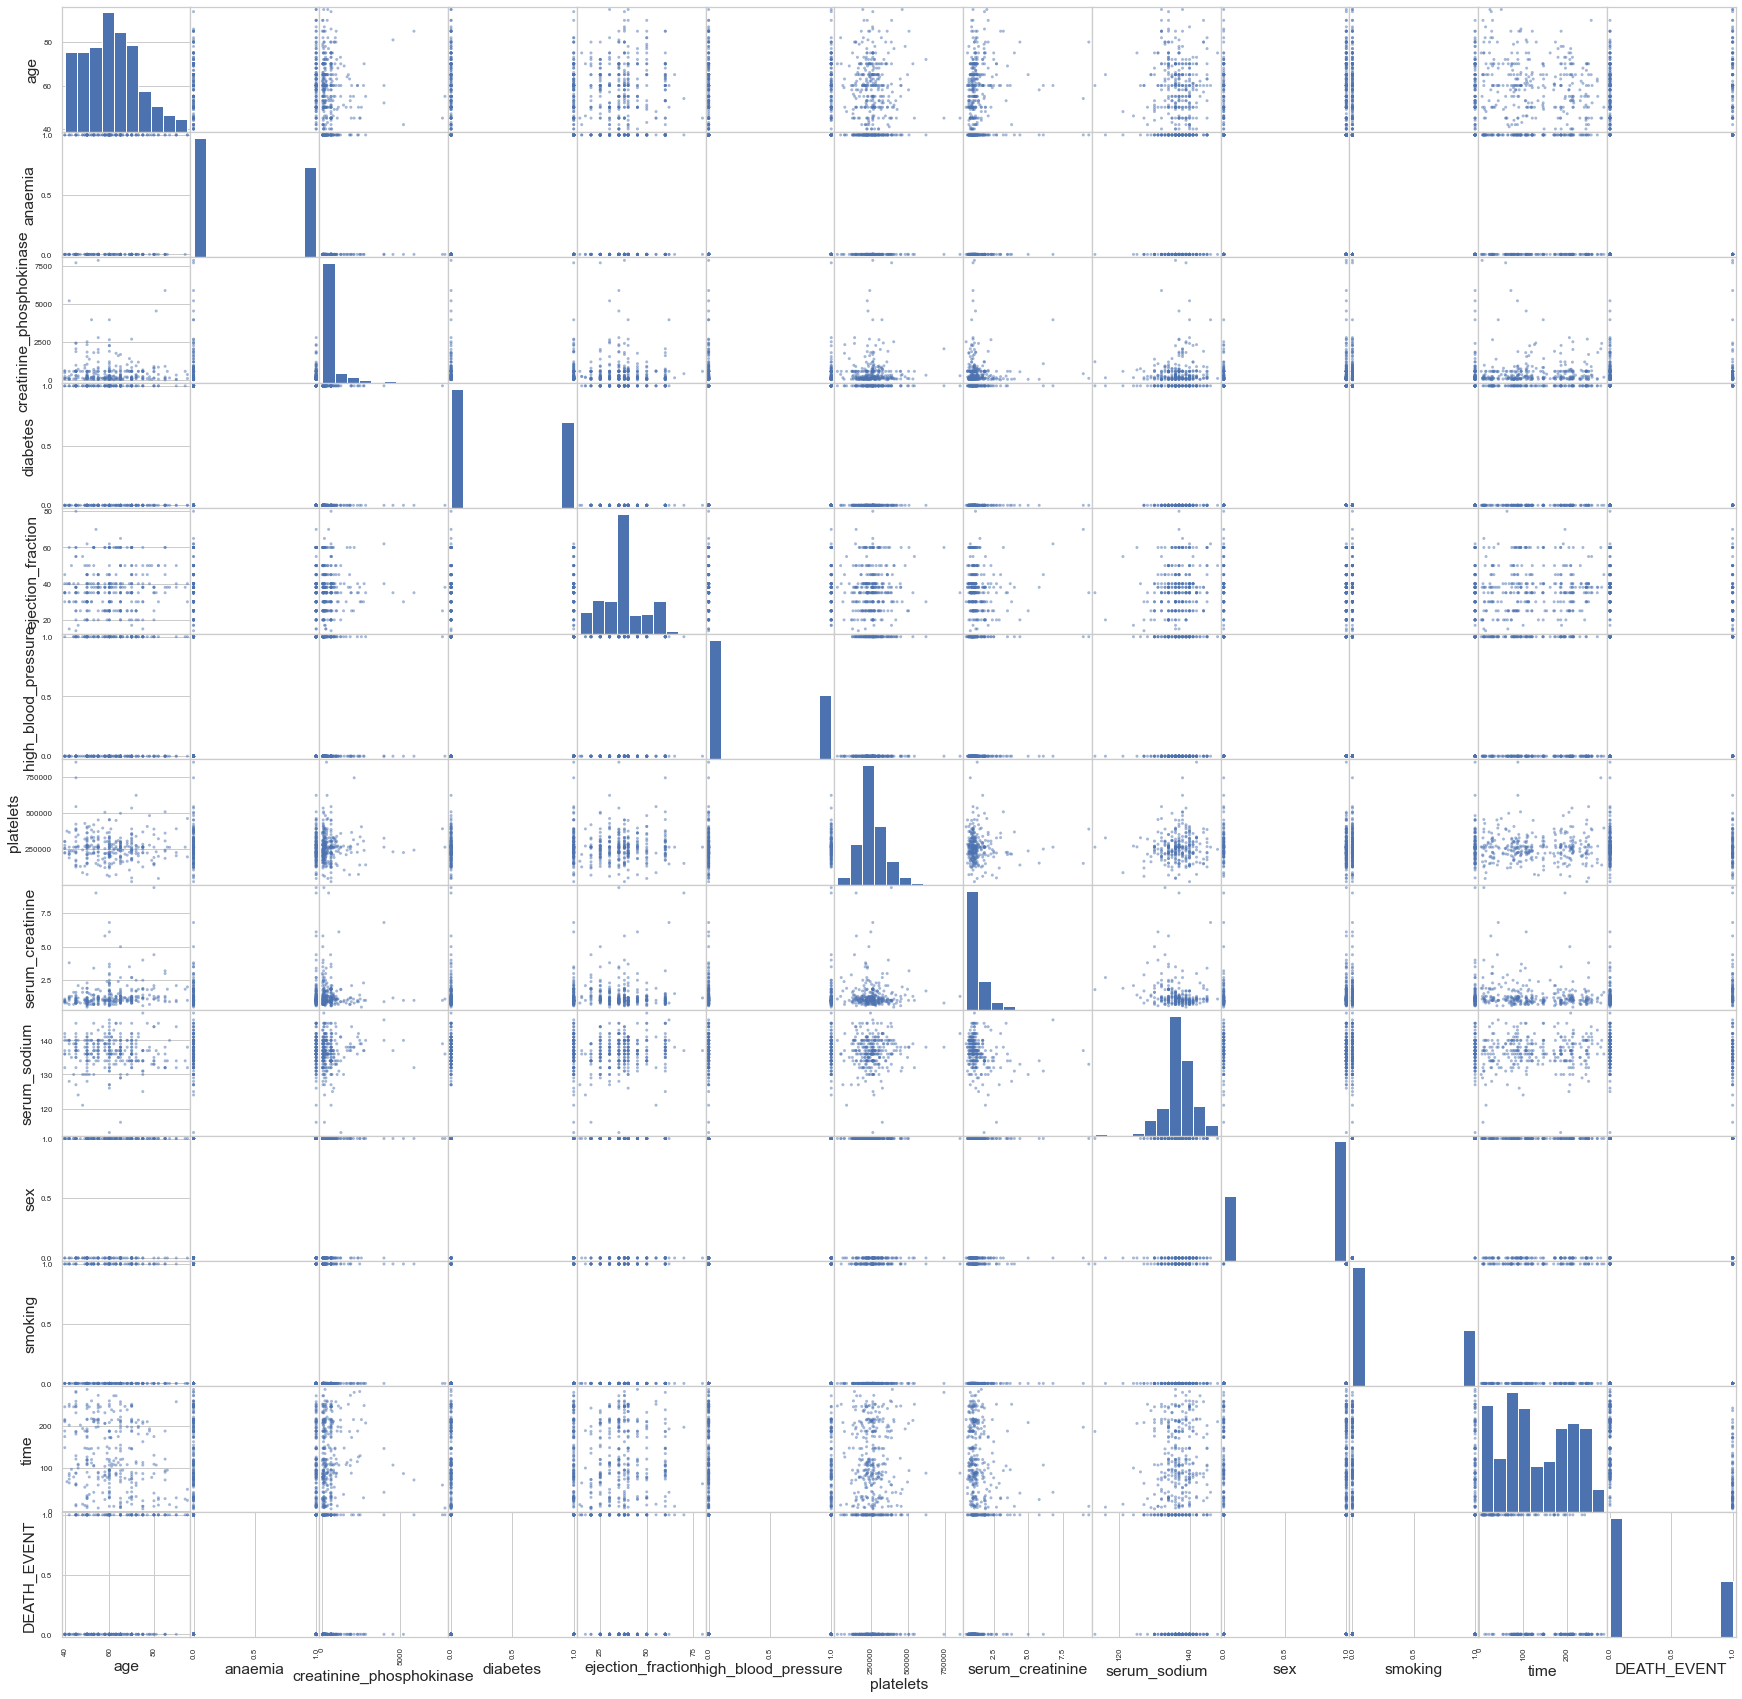

In [32]:
# scatter plot matrix
sns.set(rc={'figure.figsize':(30,30)}, font_scale=1.3, style='whitegrid')
scatter_matrix(heart_dataset)
plt.show()

In [33]:
#viewing the correlation between all the colummns in numeric values without heatmap
heart_dataset.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


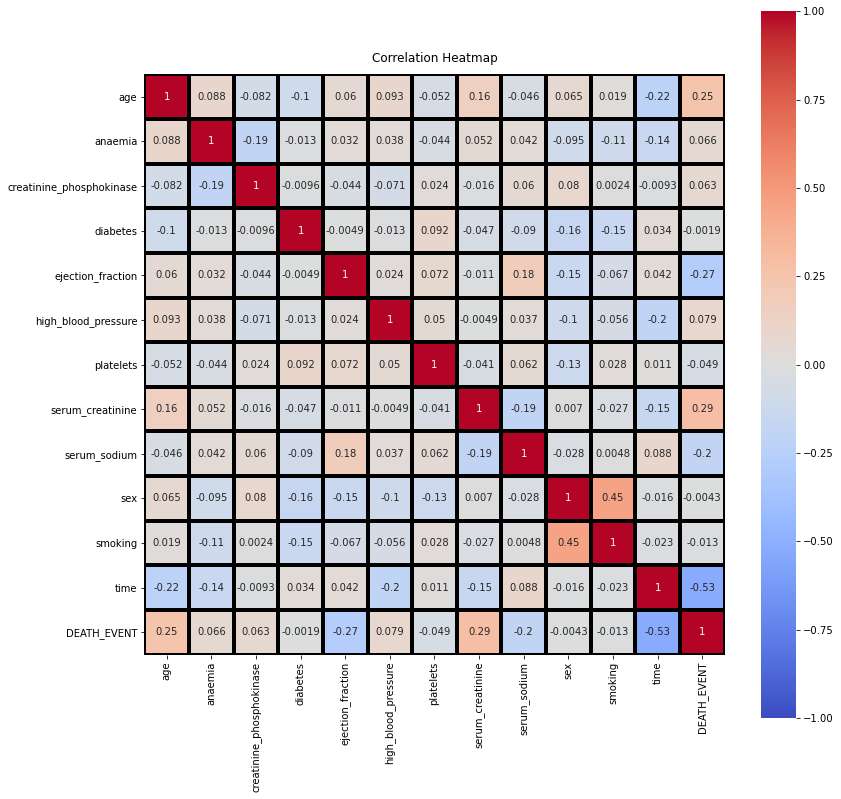

In [12]:
#viewing the correlation between all the colummns in numeric values with heatmap

# the size of the heatmap.
plt.figure(figsize=(13, 13))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from with vmin and vmax from -1 to 1.
# Set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(heart_dataset.corr(), 
                      vmin=-1,
                      vmax=1, 
                      annot=True, 
                      cmap= 'coolwarm', #color of the map
                      linewidths=3, #width of the line
                      linecolor='black', #select the line color
                      square=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# From the heat map above, we can tell that there are not many relationship between variables as there are many negative correlation
# There are more blue squares as compared to orange squares. 
# This means that there are many variables that are inversely related meaning that one variable will decrease and the other increase

# Values closer to zero means there is no linear trend between the two variables. 
# The close to 1 the correlation is the more positively correlated they are; 
# that is as one increases so does the other and the closer to 1 the stronger this relationship is. 
# A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. 

# the highest correlation is smoking and sex
# The most negative correlation is time and death event
# There are a few features that has no correlation. 
# While there a few which has positive correlation and some negative correlation which are close to 0

In [ ]:
#Training of model

In [16]:
# for the x array, we take all features except death_event
# for the y array, we only take death_event
x = heart_dataset.iloc[:, :-1]
y = heart_dataset.iloc[:,-1]
print (x,y)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [8]:
array = heart_dataset.values

X = heart_dataset.iloc[:, :-1]
Y = heart_dataset.iloc[:,-1]

seed = 7
scoring = 'accuracy'

#split the data set in a training set (70%) and a test set (30%)
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=7)

In [9]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGB', xgboost.XGBRFClassifier()))
models.append(('LGBM', lightgbm.LGBMClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)       
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\timot\Miniconda3\envs\ai\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.785000 (0.067462)
KNN: 0.626905 (0.084045)
CART: 0.779762 (0.083376)
NB: 0.765238 (0.112325)


C:\Users\timot\Miniconda3\envs\ai\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\timot\Miniconda3\envs\ai\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\timot\Miniconda3\envs\ai\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\timot\Miniconda3\envs\ai\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_stat

SVM: 0.659286 (0.135912)


C:\Users\timot\Miniconda3\envs\ai\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBC: 0.784286 (0.089697)


C:\Users\timot\Miniconda3\envs\ai\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.784048 (0.085662)
LGBM: 0.798810 (0.063987)


In [ ]:
# From the cross validation results,
# we can see that the top 3 models are 
# 1) LGBM - 0.798810
# 2) GBC: 0.794762
# 3) LR - 0.785000

In [12]:
# Make predictions on validation dataset
LBGM = lightgbm.LGBMClassifier()
LBGM.fit(x_train, y_train)
LBGM_predictions = LBGM.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_test, LBGM_predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, LBGM_predictions))
print()
print("Classification report:")
print(classification_report(y_test, LBGM_predictions))

Accuracy:
0.8555555555555555

Confusion matrix:
[[61  4]
 [ 9 16]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        65
           1       0.80      0.64      0.71        25

    accuracy                           0.86        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.85      0.86      0.85        90



In [13]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(x_train, y_train)
LR_predictions = LR.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_test, LR_predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, LR_predictions))
print()
print("Classification report:")
print(classification_report(y_test, LR_predictions))

Accuracy:
0.8333333333333334

Confusion matrix:
[[58  7]
 [ 8 17]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        65
           1       0.71      0.68      0.69        25

    accuracy                           0.83        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.83      0.83      0.83        90



In [11]:
# Make predictions on validation dataset
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
GBC_predictions = GBC.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_test, GBC_predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, GBC_predictions))
print()
print("Classification report:")
print(classification_report(y_test, GBC_predictions))

Accuracy:
0.8888888888888888

Confusion matrix:
[[60  5]
 [ 5 20]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        65
           1       0.80      0.80      0.80        25

    accuracy                           0.89        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.89      0.89      0.89        90



In [ ]:
# checking the accuracy and mean error before cleaning up

In [15]:
array = heart_dataset.values

X = heart_dataset.iloc[:, :-1]
Y = heart_dataset.iloc[:,-1]

seed = 7
scoring = 'accuracy'

#split the data set in a training set (70%) and a test set (30%)
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=7)

In [13]:
#create an array to include all the model name and accuracy
model_list=[]
model_accuracy_list = []

In [18]:
# logistic regression model

logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
logreg.fit(x_train, y_train)

logreg_pred = logreg.predict(x_test)

logreg_acc = accuracy_score(y_test, logreg_pred)

model_list.append('logreg')
model_accuracy_list.append(100*logreg_acc)

# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(y_train, logreg.predict(x_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(y_test, logreg.predict(x_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

joblib.dump(logreg, 'models//LR_model.pkl')

Training Set Mean Absolute Error: 0.1818
Test Set Mean Absolute Error: 0.1667


['models//LR_model.pkl']

In [17]:
# Decision Tree Classifier

GB_clf = GradientBoostingClassifier()
GB_clf.fit(x_train, y_train)

GB_pred = GB_clf.predict(x_test)

GB_acc = accuracy_score(y_test, GB_pred)

model_list.append('GB_clf')
model_accuracy_list.append(100*GB_acc)

# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(y_train, GB_clf.predict(x_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(y_test, GB_clf.predict(x_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

joblib.dump(GB_clf, 'models//GBC_model.pkl')

Training Set Mean Absolute Error: 0.0000
Test Set Mean Absolute Error: 0.1111


['models//GBC_model.pkl']

In [19]:
#  lightgbm 

lgb_clf = lightgbm.LGBMClassifier()
lgb_clf.fit(x_train,y_train)

lgb_pred = lgb_clf.predict(x_test)

lgb_acc = accuracy_score(y_test, lgb_pred)

model_list.append('lgb_clf')
model_accuracy_list.append(100*lgb_acc)

# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(y_train, lgb_clf.predict(x_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(y_test, lgb_clf.predict(x_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

joblib.dump(lgb_clf, 'models//LGBM.pkl')

Training Set Mean Absolute Error: 0.0000
Test Set Mean Absolute Error: 0.1444


['models//LGBM.pkl']

In [20]:
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* logreg_acc))
print( "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))
print("Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* lgb_acc))

Accuracy of Logistic Regression is :  83.33%
Accuracy of Decision Tree Classifier is :  84.44%
Accuracy of LGBMClassifier is :  85.56%


In [19]:
# These are the feature labels from our data set
feature_labels = np.array(['age', 
                           'anaemia',
                           'creatinine_phosphokinase', 
                           'diabetes', 
                           'ejection_fraction', 
                           'high_blood_pressure',
                           'platelets',
                           'serum_creatinine',
                           'serum_sodium',
                           'sex',
                           'smoking',
                           'time',
                           'DEATH_EVENT'
                          ])
    
# Load the trained model created with train_model.py
model = joblib.load('models//LR_model.pkl')

# Create a numpy array based on the model's feature importances
importance = model.coef_[0]

# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

ejection_fraction - -5.53%
time - -2.00%
high_blood_pressure - -0.03%
diabetes - -0.03%
platelets - -0.00%
creatinine_phosphokinase - 0.00%
anaemia - 0.02%
sex - 0.02%
smoking - 0.03%
serum_creatinine - 0.55%
serum_sodium - 0.76%
age - 5.17%


In [20]:
# These are the feature labels from our data set
feature_labels = np.array(['age', 
                           'anaemia',
                           'creatinine_phosphokinase', 
                           'diabetes', 
                           'ejection_fraction', 
                           'high_blood_pressure',
                           'platelets',
                           'serum_creatinine',
                           'serum_sodium',
                           'sex',
                           'smoking',
                           'time',
                           'DEATH_EVENT'
                          ])
    
# Load the trained model created with train_model.py
model = joblib.load('models//GBC_model.pkl')

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

smoking - 0.01%
high_blood_pressure - 0.01%
sex - 0.18%
anaemia - 0.27%
diabetes - 0.72%
creatinine_phosphokinase - 6.74%
age - 6.81%
serum_sodium - 7.70%
platelets - 7.93%
serum_creatinine - 8.79%
ejection_fraction - 9.32%
time - 51.52%


In [23]:
# These are the feature labels from our data set
feature_labels = np.array(['age', 
                           'anaemia',
                           'creatinine_phosphokinase', 
                           'diabetes', 
                           'ejection_fraction', 
                           'high_blood_pressure',
                           'platelets',
                           'serum_creatinine',
                           'serum_sodium',
                           'sex',
                           'smoking',
                           'time',
                           'DEATH_EVENT'
                          ])
    
# Load the trained model created with train_model.py
model = joblib.load('models//LGBM.pkl')

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

smoking - 400.00%
anaemia - 500.00%
high_blood_pressure - 1000.00%
diabetes - 1600.00%
sex - 1800.00%
age - 6500.00%
serum_sodium - 6900.00%
serum_creatinine - 8400.00%
ejection_fraction - 8600.00%
creatinine_phosphokinase - 9100.00%
platelets - 12700.00%
time - 17900.00%


In [ ]:
# from the 3 models, the least 3 features that is not revelant are
#LR:
# ejection_fraction
# time
# high_blood_pressure
# diabetes
# platelets

#GBC:
# smoking
# high_blood_pressure
# sex
# anaemia
# diabetes

# LGBM:
# smoking
# anaemia
# high_blood_pressure
# diabetes
# sex

# The least 3 importants are high blood pressure(3), diabetes(3) , sex(2), smoking(2), anaemia(2) 

# so we will drop high blood pressure, sex (as it is not related to heart failure) , diabetes 

In [ ]:
# Now i will bin the data for ejection fraction and serum creatinine

In [9]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

bin_ranges = [0, 35, 39, 40, 55, 71]
bin_names = [1, 2, 3, 4, 5]
df['ejection_fraction_bin_custom_range'] = pd.cut(
                                                    np.array(
                                                    df['ejection_fraction']), 
                                                    bins=bin_ranges)
df['ejection_fraction_bin_custom_label'] = pd.cut(
                                                    np.array(
                                                    df['ejection_fraction']), 
                                                    bins=bin_ranges,            
                                                    labels=bin_names)

df.to_csv('heart_dataset_after_EF_binned.csv')

In [10]:
#load the dataset
heart_dataset_after_EF_binned = pd.read_csv("heart_dataset_after_EF_binned.csv", index_col=[0])

df.to_csv('heart_dataset_after_EF_binned.csv')

In [11]:
#get total number of rows and columns
print(heart_dataset_after_EF_binned.shape)

(299, 15)


In [60]:
print(heart_dataset_after_binned.head(20))

     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75.0        0                       582         0                 20   
1   55.0        0                      7861         0                 38   
2   65.0        0                       146         0                 20   
3   50.0        1                       111         0                 20   
4   65.0        1                       160         1                 20   
5   90.0        1                        47         0                 40   
6   75.0        1                       246         0                 15   
7   60.0        1                       315         1                 60   
8   65.0        0                       157         0                 65   
9   80.0        1                       123         0                 35   
10  75.0        1                        81         0                 38   
11  62.0        0                       231         0                 25   
12  45.0    

In [12]:
df = pd.read_csv("heart_dataset_after_EF_binned.csv", index_col=[0])

bin_ranges = [0, 0.6, 1.2, 5.0]
bin_names = [1, 2, 3]
df['serum_creatinine_bin_custom_range'] = pd.cut(
                                                    np.array(
                                                    df['serum_creatinine']), 
                                                    bins=bin_ranges)
df['serum_creatinine_bin_custom_label'] = pd.cut(
                                                    np.array(
                                                    df['serum_creatinine']), 
                                                    bins=bin_ranges,            
                                                    labels=bin_names)

df.to_csv('heart_dataset_after_EF_SC_binned.csv')

In [13]:
#load the dataset
heart_dataset_after_EF_SC_binned = pd.read_csv("heart_dataset_after_EF_SC_binned.csv",  index_col=[0, 1, 2])

df.to_csv('heart_dataset_after_EF_SC_binned.csv')

In [14]:
#get total number of rows and columns
heart_dataset_after_clean_up = pd.read_csv("heart_dataset_after_EF_SC_binned.csv")

print(heart_dataset_after_clean_up.shape)

(299, 18)


In [15]:
print(df.head(20))

     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75.0        0                       582         0                 20   
1   55.0        0                      7861         0                 38   
2   65.0        0                       146         0                 20   
3   50.0        1                       111         0                 20   
4   65.0        1                       160         1                 20   
5   90.0        1                        47         0                 40   
6   75.0        1                       246         0                 15   
7   60.0        1                       315         1                 60   
8   65.0        0                       157         0                 65   
9   80.0        1                       123         0                 35   
10  75.0        1                        81         0                 38   
11  62.0        0                       231         0                 25   
12  45.0    

In [83]:
#had to remove some columns as they are not needed in the training model

In [14]:
#remove the fields from the data set that we don't want to include in our model
df = pd.read_csv("heart_dataset_after_EF_SC_binned.csv", index_col=[0] )

del df["high_blood_pressure"]
del df["sex"]
del df["diabetes"]
del df["ejection_fraction"]
del df['ejection_fraction_bin_custom_range']
del df["serum_creatinine"]
del df['serum_creatinine_bin_custom_range']

df.to_csv('heart_failure_clinical_records_dataset_after_cleanup.csv')

In [26]:
# there are only 8 columns removed which is the 
# 1) id of the column
# 2) High blood pressure
# 3) sex
# 4) diabetes
# 5) ejection_fraction
# 6) ejection_fraction_bin_custom_range
# 7) serum_creatinine
# 8) serum_creatinine_bin_custom_range

In [24]:
heart_dataset_after_cleanup = pd.read_csv("heart_failure_clinical_records_dataset_after_cleanup.csv" , index_col=[0])

print(heart_dataset_after_cleanup.columns.values)

['age' 'anaemia' 'creatinine_phosphokinase' 'platelets' 'serum_sodium'
 'smoking' 'time' 'DEATH_EVENT' 'ejection_fraction_bin_custom_label'
 'serum_creatinine_bin_custom_label']


In [25]:
print(heart_dataset_after_cleanup.head(15))

     age  anaemia  creatinine_phosphokinase  platelets  serum_sodium  smoking  \
0   75.0        0                       582  265000.00           130        0   
1   55.0        0                      7861  263358.03           136        0   
2   65.0        0                       146  162000.00           129        1   
3   50.0        1                       111  210000.00           137        0   
4   65.0        1                       160  327000.00           116        0   
5   90.0        1                        47  204000.00           132        1   
6   75.0        1                       246  127000.00           137        0   
7   60.0        1                       315  454000.00           131        1   
8   65.0        0                       157  263358.03           138        0   
9   80.0        1                       123  388000.00           133        1   
10  75.0        1                        81  368000.00           131        1   
11  62.0        0           

In [28]:
# removing the nan value 

def clean_dataset(heart_dataset_after_cleanup):
    assert isinstance(heart_dataset_after_cleanup, pd.DataFrame), "df needs to be a pd.DataFrame"
    heart_dataset_after_cleanup.dropna(inplace=True)
    indices_to_keep = ~heart_dataset_after_cleanup.isin([np.nan, np.inf, -np.inf]).any(1)
    return heart_dataset_after_cleanup[indices_to_keep].astype(np.float64)

print(clean_dataset(heart_dataset_after_cleanup))

heart_dataset_after_cleanup.to_csv('heart_failure_clinical_records_dataset_after_cleanup_2.csv')

      age  anaemia  creatinine_phosphokinase  platelets  serum_sodium  \
0    75.0      0.0                     582.0  265000.00         130.0   
1    55.0      0.0                    7861.0  263358.03         136.0   
2    65.0      0.0                     146.0  162000.00         129.0   
3    50.0      1.0                     111.0  210000.00         137.0   
4    65.0      1.0                     160.0  327000.00         116.0   
..    ...      ...                       ...        ...           ...   
294  62.0      0.0                      61.0  155000.00         143.0   
295  55.0      0.0                    1820.0  270000.00         139.0   
296  45.0      0.0                    2060.0  742000.00         138.0   
297  45.0      0.0                    2413.0  140000.00         140.0   
298  50.0      0.0                     196.0  395000.00         136.0   

     smoking   time  DEATH_EVENT  ejection_fraction_bin_custom_label  \
0        0.0    4.0          1.0                   

In [2]:
heart_dataset_after_cleanup = pd.read_csv('heart_failure_clinical_records_dataset_after_cleanup_2.csv', index_col=[0])

heart_dataset_after_cleanup.describe()

,age,anaemia,creatinine_phosphokinase,platelets,serum_sodium,smoking,time,DEATH_EVENT,ejection_fraction_bin_custom_label,serum_creatinine_bin_custom_label
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,60.861208,0.426621,572.464164,263738.343652,136.631399,0.324232,131.409556,0.313993,2.276451,2.310580
std,11.919906,0.495432,958.617914,98098.525203,4.403529,0.468888,77.468970,0.464908,1.462555,0.499099
min,40.000000,0.000000,23.000000,25100.000000,113.000000,0.000000,4.000000,0.000000,1.000000,1.000000
25%,51.000000,0.000000,115.000000,213000.000000,134.000000,0.000000,74.000000,0.000000,1.000000,2.000000
50%,60.000000,0.000000,249.000000,262000.000000,137.000000,0.000000,117.000000,0.000000,2.000000,2.000000
75%,70.000000,1.000000,582.000000,304000.000000,140.000000,1.000000,205.000000,1.000000,4.000000,3.000000
max,95.000000,1.000000,7861.000000,850000.000000,148.000000,1.000000,285.000000,1.000000,5.000000,3.000000


In [3]:
# Based on the feature importance table, the top 5 feature selected are:
# age, diabetes, time, DEATH_EVENT, ejection_fraction and serum_creatinine
heart_dataset_after_cleanup = pd.read_csv("heart_failure_clinical_records_dataset_after_cleanup_2.csv")

Features = ['age', 'anaemia', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'smoking', 'time', 'ejection_fraction_bin_custom_label', 'serum_creatinine_bin_custom_label'] 

X = heart_dataset_after_cleanup[Features]
Y = heart_dataset_after_cleanup["DEATH_EVENT"]

X.head()

,age,anaemia,creatinine_phosphokinase,platelets,serum_sodium,smoking,time,ejection_fraction_bin_custom_label,serum_creatinine_bin_custom_label
0,75.0,0,582,265000.00,130,0,4,1.0,3.0
1,55.0,0,7861,263358.03,136,0,6,2.0,2.0
2,65.0,0,146,162000.00,129,1,7,1.0,3.0
3,50.0,1,111,210000.00,137,0,7,1.0,3.0
4,65.0,1,160,327000.00,116,0,8,1.0,3.0


In [4]:
# Based on the feature importance table, the top 5 feature selected are:
# age, diabetes, time, DEATH_EVENT, ejection_fraction and serum_creatinine
heart_dataset_after_cleanup = pd.read_csv("heart_failure_clinical_records_dataset_after_cleanup_2.csv")

Features = ['age', 'anaemia', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'smoking', 'time', 'ejection_fraction_bin_custom_label', 'serum_creatinine_bin_custom_label'] 

X = heart_dataset_after_cleanup[Features]
Y = heart_dataset_after_cleanup["DEATH_EVENT"]

# Test options and evaluation metric
scoring = 'accuracy'
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size= 0.3, random_state= 7)

In [5]:
# Make predictions on validation dataset
# Checking accuracy and mse after clean up
LR = LogisticRegression()
LR.fit(x_train, y_train)
LR_predictions = LR.predict(x_test)

print("Logistic Regression")
print("Accuracy:")
print(accuracy_score(y_test, LR_predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, LR_predictions))
print()
print("Classification report:")
print(classification_report(y_test, LR_predictions))

Logistic Regression
Accuracy:
0.75

Confusion matrix:
[[55  6]
 [16 11]]

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        61
           1       0.65      0.41      0.50        27

    accuracy                           0.75        88
   macro avg       0.71      0.65      0.67        88
weighted avg       0.74      0.75      0.73        88



In [37]:
# Create the model
model = LogisticRegression()

# Parameters we want to try
# Penalty: l1 or l2 which species the norm used in the penalization. #l1 is Lasso, l2 is Ridge
# C: Inverse of regularization strength- smaller values of C specify stronger regularization.
param_grid = {
    "C":[0.001,.009,0.01,.09,1,5,10,25],
    "penalty":["l1","l2" ]
}

# Define the grid search we want to run. Run it with four cpus in parallel.
gs_cv = GridSearchCV(model, param_grid, n_jobs=6, verbose=100)

# Run the grid search - on only the training data!
gs_cv.fit(x_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

print("tuned hpyerparameters :(best parameters) ",gs_cv.best_params_)
print("accuracy :",gs_cv.best_score_)

# After running the grid search, the output for best parameter was
# 'C': 0.009
# 'penalty': 'l2'

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    5.6s
[Parallel(

['logistic_regression_model.pkl']

In [32]:
# Make predictions on validation dataset
# Checking accuracy and mse after clean up
LR = LogisticRegression(C=0.009, penalty= 'l2', solver='lbfgs', multi_class='multinomial', max_iter=51, n_jobs=6, verbose=100)
LR.fit(x_train, y_train)
LR_predictions = LR.predict(x_test)

print("Logistic Regression")
print("Accuracy:")
print(accuracy_score(y_test, LR_predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, LR_predictions))
print()
print("Classification report:")
print(classification_report(y_test, LR_predictions))

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:    0.9s finished
Logistic Regression
Accuracy:
0.7840909090909091

Confusion matrix:
[[59  2]
 [17 10]]

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        61
           1       0.83      0.37      0.51        27

    accuracy                           0.78        88
   macro avg       0.80      0.67      0.69        88
weighted avg       0.79      0.78      0.75        88



In [128]:
#find the error rate on the training set
mse = mean_absolute_error(y_train, gs_cv.predict(x_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

#find the error rate on the test set
mse = mean_absolute_error(y_test, gs_cv.predict(x_test))
print("Test set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.1366
Test set Mean Absolute Error: 0.2386


In [4]:
# Make predictions on validation dataset
GB_clf = GradientBoostingClassifier()
GB_clf.fit(x_train, y_train)
GB_pred = GB_clf.predict(x_test)

print("Gradient Boosting Classifier")
print("Accuracy:")
print(accuracy_score(y_test, GB_pred))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, GB_pred))
print()
print("Classification report:")
print(classification_report(y_test, GB_pred))

Gradient Boosting Classifier
Accuracy:
0.7613636363636364

Confusion matrix:
[[52  9]
 [12 15]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        61
           1       0.62      0.56      0.59        27

    accuracy                           0.76        88
   macro avg       0.72      0.70      0.71        88
weighted avg       0.75      0.76      0.76        88



In [6]:
# Create the model
model = GradientBoostingClassifier()

# Parameters we want to try
# Penalty: l1 or l2 which species the norm used in the penalization. #l1 is Lasso, l2 is Ridge
# C: Inverse of regularization strength- smaller values of C specify stronger regularization.
param_grid = {
    'loss': ['deviance','exponential'],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5],
    'n_estimators': [1, 25, 50, 75, 100],
    'subsample': [1,2,3,4,5],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'min_samples_split': [1,2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'max_depth' : [1,2,3,4]
}

# Define the grid search we want to run. Run it with four cpus in parallel.
gs_cv = GridSearchCV(model, param_grid, n_jobs=4, verbose=100)

# Run the grid search - on only the training data!
gs_cv.fit(x_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

print("tuned hpyerparameters :(best parameters) ",gs_cv.best_params_)
print("accuracy :",gs_cv.best_score_)

# The best parameter are
# {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 25, 'subsample': 1}

Fitting 5 folds for each of 48000 candidates, totalling 240000 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.8s
[Pa

In [7]:
# Make predictions on validation dataset
GB_clf = GradientBoostingClassifier(
    loss = 'deviance',
    learning_rate = 0.1,
    n_estimators = 25,
    subsample = 1,
    criterion = 'friedman_mse',
    min_samples_split = 4,
    min_samples_leaf = 3,
    max_depth = 4)
GB_clf.fit(x_train, y_train)
GB_pred = GB_clf.predict(x_test)

print("Accuracy:")
print(accuracy_score(y_test, GB_pred))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, GB_pred))
print()
print("Classification report:")
print(classification_report(y_test, GB_pred))

Accuracy:
0.7613636363636364

Confusion matrix:
[[52  9]
 [12 15]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        61
           1       0.62      0.56      0.59        27

    accuracy                           0.76        88
   macro avg       0.72      0.70      0.71        88
weighted avg       0.75      0.76      0.76        88



In [30]:
#find the error rate on the training set
mse = mean_absolute_error(y_train, gs_cv.predict(x_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

#find the error rate on the test set
mse = mean_absolute_error(y_test, gs_cv.predict(x_test))
print("Test set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.1268
Test set Mean Absolute Error: 0.2045


In [29]:
# Make predictions on validation dataset
lgb_clf = lightgbm.LGBMClassifier()
lgb_clf.fit(x_train, y_train)
lgb_clf_pred = lgb_clf.predict(x_test)

print("Light GBM Classifier")
print("Accuracy:")
print(accuracy_score(y_test, lgb_clf_pred))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, lgb_clf_pred))
print()
print("Classification report:")
print(classification_report(y_test, lgb_clf_pred))

# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(y_train, lgb_clf.predict(x_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(y_test, lgb_clf.predict(x_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Light GBM Classifier
Accuracy:
0.8181818181818182

Confusion matrix:
[[54  7]
 [ 9 18]]

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        61
           1       0.72      0.67      0.69        27

    accuracy                           0.82        88
   macro avg       0.79      0.78      0.78        88
weighted avg       0.82      0.82      0.82        88

Training Set Mean Absolute Error: 0.0000
Test Set Mean Absolute Error: 0.1818


In [118]:
# Create the model
model = lightgbm.LGBMClassifier()

# Parameters we want to try
param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['ls', 'lad', 'huber']
}

# Define the grid search we want to run. Run it with four cpus in parallel.
gs_cv = GridSearchCV(model, param_grid, n_jobs=4, verbose=100)

# Run the grid search - on only the training data!
gs_cv.fit(x_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

print("tuned hpyerparameters :(best parameters) ",gs_cv.best_params_)
print("accuracy :",gs_cv.best_score_)

# After running a .....long..... time, the output will be something like
# {'loss': 'huber', 'learning_rate': 0.1, 'min_samples_leaf': 9, 'n_estimators': 3000, 'max_features': 0.1, 'max_depth': 6}

# That is the combination that worked best.
joblib.dump(model, 'LGBM.pkl')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    4.0s
[Parall

['LGBM.pkl']

In [3]:
# Based on the feature importance table, the top 5 feature selected are:
# age, diabetes, time, DEATH_EVENT, ejection_fraction and serum_creatinine
heart_dataset_after_cleanup = pd.read_csv("heart_failure_clinical_records_dataset_after_cleanup_2.csv")

Features = ['age', 'anaemia', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'smoking', 'time', 'ejection_fraction_bin_custom_label', 'serum_creatinine_bin_custom_label'] 

X = heart_dataset_after_cleanup[Features]
Y = heart_dataset_after_cleanup["DEATH_EVENT"]

# Test options and evaluation metric
scoring = 'accuracy'
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size= 0.3, random_state= 7)

In [4]:
X.head()

,age,anaemia,creatinine_phosphokinase,platelets,serum_sodium,smoking,time,ejection_fraction_bin_custom_label,serum_creatinine_bin_custom_label
0,75.0,0,582,265000.00,130,0,4,1.0,3.0
1,55.0,0,7861,263358.03,136,0,6,2.0,2.0
2,65.0,0,146,162000.00,129,1,7,1.0,3.0
3,50.0,1,111,210000.00,137,0,7,1.0,3.0
4,65.0,1,160,327000.00,116,0,8,1.0,3.0


In [8]:
# Make predictions on validation dataset
lgb_clf = lightgbm.LGBMClassifier(
            boosting_type = 'gbdt',
            learning_rate = 0.02,
            #loss = 'ls',
            max_depth = 6,
            #max_features = 1.0,
            #min_samples_leaf = 3, 
            n_estimators = 500,
            num_leaves=32,
            seed= 7,
            #min_data_in_leaf= 10 
        )
lgb_clf.fit(x_train, y_train)
lgb_clf_pred = lgb_clf.predict(x_test)

print("Light GBM Classifier")
print("Accuracy:")
print(accuracy_score(y_test, lgb_clf_pred))
print()
print("Confusion matrix:")
print(confusion_matrix(y_test, lgb_clf_pred))
print()
print("Classification report:")
print(classification_report(y_test, lgb_clf_pred))

# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(y_train, lgb_clf.predict(x_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(y_test, lgb_clf.predict(x_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

joblib.dump(lgb_clf, 'LGBM.pkl')

Light GBM Classifier
Accuracy:
0.8181818181818182

Confusion matrix:
[[55  6]
 [10 17]]

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        61
           1       0.74      0.63      0.68        27

    accuracy                           0.82        88
   macro avg       0.79      0.77      0.78        88
weighted avg       0.81      0.82      0.81        88

Training Set Mean Absolute Error: 0.0000
Test Set Mean Absolute Error: 0.1818


['LGBM.pkl']

In [14]:
#find the error rate on the training set
mse = mean_absolute_error(y_train, lgb_clf.predict(x_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

#find the error rate on the test set
mse = mean_absolute_error(y_test, lgb_clf.predict(x_test))
print("Test set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.0000
Test set Mean Absolute Error: 0.1818
